# Discussion #386

## Packages version

In [1]:
import andes
import numpy as np

In [2]:
print(andes.__version__)
print(np.__version__)

1.8.3.post8+ge180c540
1.22.3


In [3]:
andes.config_logger(stream_level=50)

## Load case

In [4]:
case0 = andes.get_case('ieee14/ieee14_full.xlsx')

case_path = '/Users/jinningwang/Documents/work/andes/icebar/discussion386/'

case1 = case_path + 'ieee14_1.00_Line_12_0.80_1.00_1.30.xlsx'

case2 = case_path + 'ieee14_1.00_Line_12_0.90_1.00_1.30.xlsx'

case3 = case_path + 'ieee14_1.00_Line_12_0.95_1.00_1.30.xlsx'

In [5]:
ss0 = andes.load(case0,
                 default_config=True,
                 no_output=True)

ss1 = andes.load(case1,
                 default_config=True,
                 no_output=True)

ss2 = andes.load(case2,
                 default_config=True,
                 no_output=True)

ss3 = andes.load(case3,
                 default_config=True,
                 no_output=True)


Generating code for 1 models on 8 processes.
Generating code for 1 models on 8 processes.
Generating code for 1 models on 8 processes.
Generating code for 1 models on 8 processes.


In [6]:
andes.config_logger(stream_level=20)

Case0 is the base case in ANDES source repository.

Case1-3 is the revised case.

Case1 runs well, Case2 TDS initialization failed, and Case3 power flow failed.

These errors are common when revising the case and are usually caused by inappropriate parameters.

In below, we will show how to recognize the reasons and fix the errors.


## Case0

In [7]:
ss0.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0040 seconds.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.957087684e-12
Converged in 4 iterations in 0.0054 seconds.


True

In [8]:
ss0i = ss0.TDS.init()

Initialization for dynamics completed in 0.0293 seconds.
Initialization was successful.


In [9]:
ss0.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=20.00 sec completed in 0.3768 seconds.


True

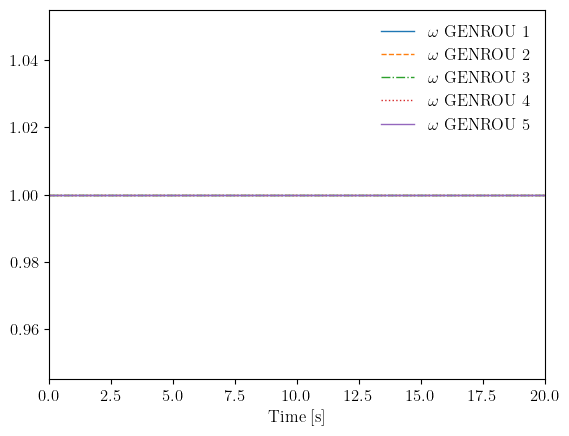

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [10]:
ss0.TDS.plt.plot(ss0.GENROU.omega)

Base case is okay.

## Case1

In [11]:
ss1.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0054 seconds.
0: |F(x)| = 8.6568834
1: |F(x)| = 7.007197233
2: |F(x)| = 1.365637093
3: |F(x)| = 0.1659350293
4: |F(x)| = 0.003034072009
5: |F(x)| = 9.897107155e-07
Converged in 6 iterations in 0.0097 seconds.


True

Power flow solved.

In [12]:
ss1i = ss1.TDS.init()

Initialization for dynamics completed in 0.0314 seconds.
Initialization was successful.


TDS initialized.

## Case2

In [13]:
ss2.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0043 seconds.
0: |F(x)| = 15.44601457
1: |F(x)| = 87.13552781
2: |F(x)| = 51.0391057
3: |F(x)| = 14.27050865
4: |F(x)| = 3.188620159
5: |F(x)| = 0.5200860572
6: |F(x)| = 0.1319546069
7: |F(x)| = 0.02833026213
8: |F(x)| = 0.007088256276
9: |F(x)| = 0.001772020979
10: |F(x)| = 0.0004430050393
11: |F(x)| = 0.0001107512598
12: |F(x)| = 2.768781496e-05
13: |F(x)| = 6.92195374e-06
14: |F(x)| = 1.730488435e-06
15: |F(x)| = 4.326221087e-07
Converged in 16 iterations in 0.0276 seconds.


True

Power flow solved.

In [14]:
ss2i = ss2.TDS.init()

GENROU (vf range) out of typical upper limit.

   idx    | values | limit
----------+--------+------
 GENROU_1 | 7.000  | 5    
 GENROU_2 | 11.206 | 5    
 GENROU_3 | 5.413  | 5    
 GENROU_4 | 36.426 | 5    
 GENROU_5 | 12.359 | 5    


ESST3A.VG_lim: adjusted limit <VGMAX>

   Idx    | Input  | Old Limit
----------+--------+----------
 ESST3A_2 | 7.000  | 3.860    
 ESST3A_3 | 5.413  | 3.860    
 ESST3A_4 | 36.426 | 3.860    
 ESST3A_5 | 12.359 | 3.860    


ESST3A.VB_lim: adjusted limit <VBMAX>

   Idx    | Input | Old Limit
----------+-------+----------
 ESST3A_4 | 7.352 | 5.480    


PQ.vcmp out of limits <vmin>

 idx   | Flag | Input Value | Limit
-------+------+-------------+------
 PQ_3  | zl   | 0.772       | 0.800
 PQ_4  | zl   | 0.782       | 0.800
 PQ_6  | zl   | -0.000      | 0.800
 PQ_7  | zl   | -0.000      | 0.800
 PQ_8  | zl   | 0.000       | 0.800
 PQ_11 | zl   | 0.369       | 0.800


ESST3A.HLI out of limits <VIMAX>

   idx    | Flag | Input Value | Limit
----------+

TDS initialization failed.

The Eqn. Mismatch items are associated with ``LL_y TGOV1`` and ``vil ESST3A``.
In the Model Reference or the model source code, it can be noticed that: 

1. ``LL_y TGOV1`` is associated with function ``LAG``, and ``LAG`` is limited by ``VMIN`` and ``VMAX``.

1. ``vil ESST3A`` is associated with ``HIL``, and ``HIL`` is limited by ``VIMIN`` and ``VIMAX``.

Usually, the failed initialization is caused by the inapproriate limiter range, and it can be addressed by adjusting the range.


In [15]:
ss2.TGOV1.as_df()

,idx,u,name,syn,Tn,wref0,R,VMAX,VMIN,T1,T2,T3,Dt
uid,,,,,,,,,,,,,
0,TGOV1_1,1.0,TGOV1_1,GENROU_1,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0
1,TGOV1_2,1.0,TGOV1_2,GENROU_2,0.0,1.0,0.05,1.20,0.0,0.10,1.0,2.1,0.0
2,TGOV1_3,1.0,TGOV1_3,GENROU_3,0.0,1.0,0.05,1.20,0.0,0.10,1.0,2.1,0.0
3,TGOV1_4,1.0,TGOV1_4,GENROU_4,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0
4,TGOV1_5,1.0,TGOV1_5,GENROU_5,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0


In [16]:
ss2.ESST3A.as_df()

,idx,u,name,syn,TR,VIMAX,VIMIN,KM,TC,TB,...,KP,KI,VBMAX,KC,XL,VGMAX,THETAP,TM,VMMAX,VMMIN
uid,,,,,,,,,,,,,,,,,,,,,
0,ESST3A_2,1.0,ESST3A_2,GENROU_1,0.02,0.2,-0.2,8.0,1.0,5.0,...,3.67,0.435,5.480000,0.01,0.0098,7.000318,3.33,0.4,99.0,0.0
1,ESST3A_3,1.0,ESST3A_3,GENROU_3,0.02,0.2,-0.2,8.0,1.0,5.0,...,3.67,0.435,5.480000,0.01,0.0098,5.413357,3.33,0.4,99.0,0.0
2,ESST3A_4,1.0,ESST3A_4,GENROU_4,0.02,0.2,-0.2,8.0,1.0,5.0,...,3.67,0.435,7.352355,0.01,0.0098,36.425544,3.33,0.4,99.0,0.0
3,ESST3A_5,1.0,ESST3A_5,GENROU_5,0.02,0.2,-0.2,8.0,1.0,5.0,...,3.67,0.435,5.480000,0.01,0.0098,12.359430,3.33,0.4,99.0,0.0


We can try to enlarge ``VMAX`` and ``VMIN`` of device ``TGOV1_1``.

However, it should be noted that since ``ss2`` has been initialziaed, we need to re-instantiate a new one.

In [17]:
sc2 = andes.load(case2,
                 default_config=True,
                 no_output=True)


Working directory: "/Users/jinningwang/Documents/work/andes/icebar/discussion386"
> Reloaded generated Python code of module "pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 8 processes.


Saved generated pycode to "/Users/jinningwang/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.1483 seconds.
Parsing input file "/Users/jinningwang/Documents/work/andes/icebar/discussion386/ieee14_1.00_Line_12_0.90_1.00_1.30.xlsx"...
Input file parsed in 0.0468 seconds.
System internal structure set up in 0.0260 seconds.


In [18]:
sc2.TGOV1.set(idx='TGOV1_1', src='VMAX', attr='v', value=10)
sc2.TGOV1.set(idx='TGOV1_1', src='VMIN', attr='v', value=0)


True

Similarly, we can try to enlarge ``VIMAX`` and ``VIMIN`` of device ``ESST3A_2`` - ``ESST3A_5``.

In [19]:
sc2.ESST3A.set(idx=['ESST3A_2', 'ESST3A_3', 'ESST3A_4', 'ESST3A_5'],
               src='VIMAX', attr='v',
               value=[10, 10, 10, 10])

sc2.ESST3A.set(idx=['ESST3A_2', 'ESST3A_3', 'ESST3A_4', 'ESST3A_5'],
               src='VIMIN', attr='v',
               value=[-10, -10, -10, -10])


True

In [20]:
sc2.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0054 seconds.
0: |F(x)| = 15.44601457
1: |F(x)| = 87.13552781
2: |F(x)| = 51.0391057
3: |F(x)| = 14.27050865
4: |F(x)| = 3.188620159
5: |F(x)| = 0.5200860572
6: |F(x)| = 0.1319546069
7: |F(x)| = 0.02833026213
8: |F(x)| = 0.007088256276
9: |F(x)| = 0.001772020979
10: |F(x)| = 0.0004430050393
11: |F(x)| = 0.0001107512598
12: |F(x)| = 2.768781496e-05
13: |F(x)| = 6.92195374e-06
14: |F(x)| = 1.730488435e-06
15: |F(x)| = 4.326221087e-07
Converged in 16 iterations in 0.0210 seconds.


True

Now, Case2 can be initialized successfully.

In [21]:
sc2i = sc2.TDS.init()

GENROU (vf range) out of typical upper limit.

   idx    | values | limit
----------+--------+------
 GENROU_1 | 7.000  | 5    
 GENROU_2 | 11.206 | 5    
 GENROU_3 | 5.413  | 5    
 GENROU_4 | 36.426 | 5    
 GENROU_5 | 12.359 | 5    


ESST3A.VG_lim: adjusted limit <VGMAX>

   Idx    | Input  | Old Limit
----------+--------+----------
 ESST3A_2 | 7.000  | 3.860    
 ESST3A_3 | 5.413  | 3.860    
 ESST3A_4 | 36.426 | 3.860    
 ESST3A_5 | 12.359 | 3.860    


ESST3A.VB_lim: adjusted limit <VBMAX>

   Idx    | Input | Old Limit
----------+-------+----------
 ESST3A_4 | 7.352 | 5.480    


PQ.vcmp out of limits <vmin>

 idx   | Flag | Input Value | Limit
-------+------+-------------+------
 PQ_3  | zl   | 0.772       | 0.800
 PQ_4  | zl   | 0.782       | 0.800
 PQ_6  | zl   | -0.000      | 0.800
 PQ_7  | zl   | -0.000      | 0.800
 PQ_8  | zl   | 0.000       | 0.800
 PQ_11 | zl   | 0.369       | 0.800


Initialization for dynamics completed in 0.0346 seconds.
Initialization was successf

## Case3

In [22]:
ss3.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0046 seconds.
0: |F(x)| = 29.31915012
1: |F(x)| = 740.0002552
2: |F(x)| = 184.73335
3: |F(x)| = 45.4526586
4: |F(x)| = 12.50794975
5: |F(x)| = 15.21453025
6: |F(x)| = 10.05942972
7: |F(x)| = 13.61984299
8: |F(x)| = 35.59466317
9: |F(x)| = 8.482561041
10: |F(x)| = 10.18377093
11: |F(x)| = 3.30210519
12: |F(x)| = 29.83519301
13: |F(x)| = 37.76487849
14: |F(x)| = 12.23775322
15: |F(x)| = 3.856617645
16: |F(x)| = 2901.501366
17: |F(x)| = 729.7337025
18: |F(x)| = 180.6417168
19: |F(x)| = 2184.801181
20: |F(x)| = 547.8476025
21: |F(x)| = 1230.613562
22: |F(x)| = 64.12087458
23: |F(x)| = 13.02606755
24: |F(x)| = 46.98123
25: |F(x)| = 94.82327295
26: |F(x)| = 29.99344683
Power flow failed after 27 iterations for "/Us

False

Power flow failed.

In [23]:
sc3 = andes.load(case3,
                 default_config=True,
                 no_output=True)


Working directory: "/Users/jinningwang/Documents/work/andes/icebar/discussion386"
> Reloaded generated Python code of module "pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 8 processes.


Saved generated pycode to "/Users/jinningwang/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.1972 seconds.
Parsing input file "/Users/jinningwang/Documents/work/andes/icebar/discussion386/ieee14_1.00_Line_12_0.95_1.00_1.30.xlsx"...
Input file parsed in 0.0551 seconds.
System internal structure set up in 0.0289 seconds.


In [24]:
ss0.Bus.as_df().iloc[-3:]

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
11,12,1.0,BUS12,138.0,1.1,0.9,0.98639,-0.128934,0,0,2,2,2
12,13,1.0,BUS13,138.0,1.1,0.9,0.98403,-0.133786,0,0,2,2,2
13,14,1.0,BUS14,138.0,1.1,0.9,0.99063,-0.166916,0,0,2,2,2


In [25]:
sc3.Bus.as_df().iloc[-3:]

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
12,13,1.0,BUS13,138.0,1.1,0.9,0.98403,-0.133786,0,0,2.0,2.0,2.0
13,14,1.0,BUS14,138.0,1.1,0.9,0.99063,-0.166916,0,0,2.0,2.0,2.0
14,15,1.0,BUS15,138.0,1.1,0.9,1.00000,0.000000,0,0,NaN,NaN,NaN


Compared to the original Case0, Case3 inserts a new device ``BUS15`` with ``v0`` and ``a0`` being set as default values.

This might be the reason why the power flow failed.

We can try to adjust those values to fix the power flow.


In [26]:
sc3.Bus.set(idx=15, src='v0', attr='v', value=0.99)
sc3.Bus.set(idx=15, src='a0', attr='v', value=-0.1)


True

In [27]:
sc3.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0038 seconds.
0: |F(x)| = 6.171679059
1: |F(x)| = 0.8778049877
2: |F(x)| = 0.05516065719
3: |F(x)| = 0.0001907369157
4: |F(x)| = 2.026405849e-09
Converged in 5 iterations in 0.0073 seconds.


True

In [28]:
sc3i = sc3.TDS.init()

Initialization for dynamics completed in 0.0289 seconds.
Initialization was successful.


Now the power flow can be solved and the TDS can be initialized successfully.